### Connect to SQL Server and Load Data into Pandas

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DRIVER_NAME = 'ODBC Driver 17 for SQL Server'
SERVER_NAME = r'DESKTOP-L3GBMQ5\SQLEXPRESS'
DATABASE_NAME = 'Healthcare_Case_Study'

connection_string = (
    f"DRIVER={{{DRIVER_NAME}}};"
    f"SERVER={SERVER_NAME};"
    f"DATABASE={DATABASE_NAME};"
    f"Trusted_Connection=yes;"
)

conn = pyodbc.connect(connection_string)
print("Connected successfully!")

Connected successfully!


In [3]:
query = 'SELECT * FROM Hospital_Operations_Cleaned_2;'

In [4]:
df = pd.read_sql(query, conn)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4744\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df.head()

,Patient_ID,Admission_Date,Discharge_Date,Department,Doctor_ID,Doctor_Name,Diagnosis,Treatment_Type,Treatment_Cost,Insurance_Type,...,Bed_ID,Region,Wait_Time_Minutes,Doctor_Experience_Years,Age,Gender,Total_Revenue,Invalid_Date_Order,Length_of_Stay,Profit
0,1000.0,2024-08-03,2024-08-07,Cardiology,53.0,Dr. Yara Hamed,Migraine,Inpatient,1559.810059,Self-Pay,...,B44,North,79.0,6,2,M,2214.439941,False,4.0,654.630005
1,1002.0,2024-11-22,2024-11-26,Ortho,104.0,Dr. Omar Saeed,Fracture,inpatient,1519.800049,Private,...,B06,South,176.0,22,4,M,2304.030029,False,4.0,784.229980
2,1003.0,2024-02-14,2024-02-23,Pediatric,26.0,Dr Rana Elbaz,Migraine,Emergency,2590.770020,Self-Pay,...,B45,North,87.0,9,29,F,3142.179932,False,9.0,551.409973
3,1004.0,2024-04-10,2024-04-22,Orthopedics,41.0,Dr. Omar Said,Migraine,Emergency,499.459991,Self-Pay,...,B09,North,140.0,8,12,M,589.419983,False,12.0,89.959999
4,1006.0,2024-03-06,2024-03-12,Oncology,15.0,Dr. Omar Said,Flu,Outpatient,1508.099976,Self-Pay,...,B36,North,56.0,13,32,F,2107.969971,False,6.0,599.869995


### Generate Correlation Heatmap for All Numeric Features

In [6]:
numeric_df = df.select_dtypes(include=[np.number])

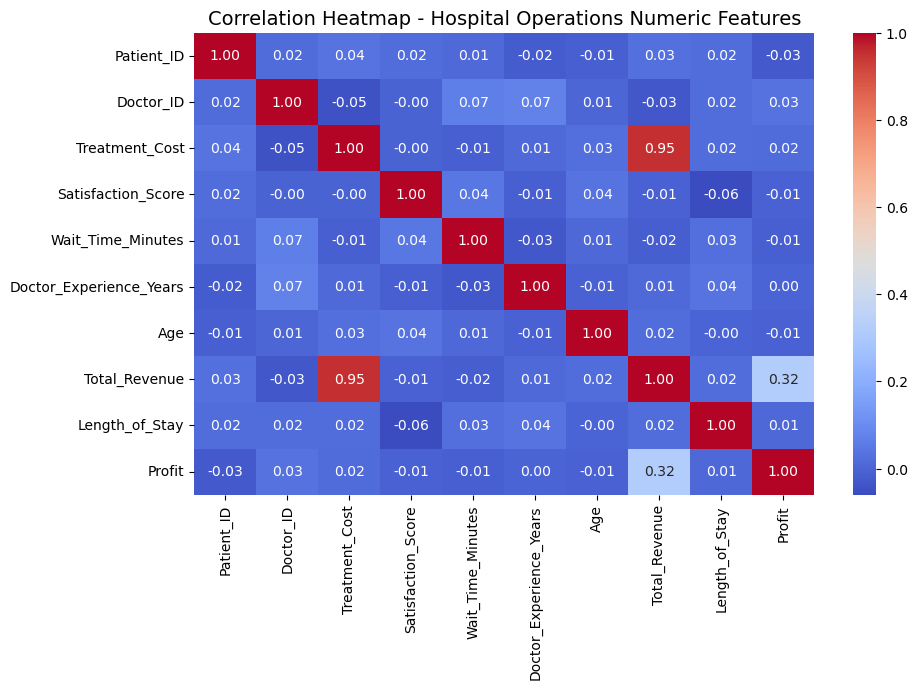

In [10]:
plt.figure(figsize = (10, 6))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap - Hospital Operations Numeric Features', fontsize = 14)
plt.show()

Strong negative correlation (close to -1): inverse relationship (e.g., wait time ↑ → satisfaction ↓).

Strong positive correlation (close to +1): direct relationship (e.g., cost ↑ → revenue ↑).

Values near 0 → weak or no linear correlation

### Forecast Monthly Patient Admissions per Department

In [11]:
# Ensure data format
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])

In [19]:
# Group and count admissions per month & department
monthly_admissions = (
    df.groupby([pd.Grouper(key='Admission_Date', freq='M'), 'Department'])
      .size()  # safer than agg({'Patient_ID': 'count'})
      .reset_index(name='Monthly_Admissions')
)

print(monthly_admissions.head())  # confirm structure


  Admission_Date        Department  Monthly_Admissions
0     2024-01-31            Cardio                  10
1     2024-01-31        Cardiology                   9
2     2024-01-31  Cardiology Dept.                  12
3     2024-01-31         Emergency                  15
4     2024-01-31          Oncology                  24


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_4744\4278877413.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key='Admission_Date', freq='M'), 'Department'])


In [20]:
monthly_admissions.head()

,Admission_Date,Department,Monthly_Admissions
0,2024-01-31,Cardio,10
1,2024-01-31,Cardiology,9
2,2024-01-31,Cardiology Dept.,12
3,2024-01-31,Emergency,15
4,2024-01-31,Oncology,24


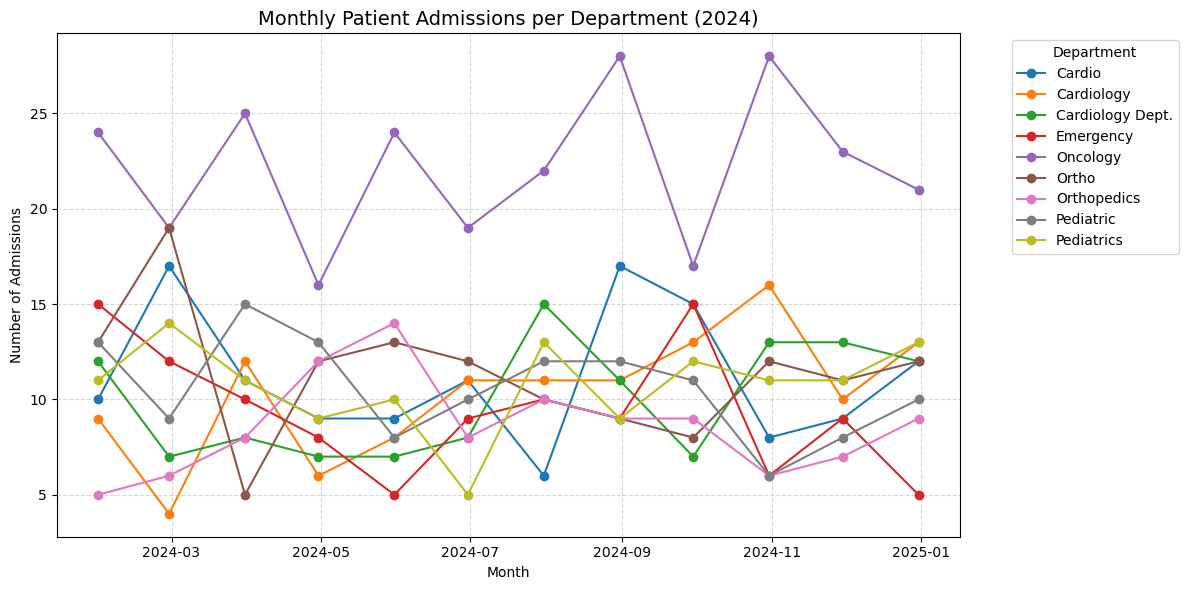

In [21]:
plt.figure(figsize=(12,6))

for dept in monthly_admissions['Department'].unique():
    subset = monthly_admissions[monthly_admissions['Department'] == dept]
    plt.plot(subset['Admission_Date'], subset['Monthly_Admissions'], marker='o', label=dept)

plt.title("Monthly Patient Admissions per Department (2024)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Admissions")
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
